The mixing experiment is analyzed here.

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
from IPython.display import set_matplotlib_formats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import truth_sets_aaf as tsa
import pandas as pd
import multi_prec_recall as multipr
import seaborn

In [16]:
if False:
    pr = multipr.prepare_reduce_precrecall_all()
    pr.to_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/pr.csv', index=False)
pr = multipr.read_pr_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/pr.csv')
pr = multipr.fix_names(pr)
pr = multipr.singles2paireds(pr)

In [17]:
if False:
    vmcbn = '/big/results/bsm/2018-06-22-variant-meta-caller-test/vmc-prioritize-benchmark/'
    vmc_pr_chr22_thinks = multipr.vmc_prepare_reduce_precrecall(csetVCF=vmcbn + 'test12/vmc-test12.vcf.gz', region='chr22', vartype='snp', machine='ThinkS')
    vmc_pr_chr22_ada = multipr.vmc_prepare_reduce_precrecall(csetVCF=vmcbn + 'test14ada/vmc-test14ada.vcf.gz', region='chr22', vartype='snp', machine='Ada')
    vmc_pr_chr22 = pd.concat([vmc_pr_chr22_thinks, vmc_pr_chr22_ada])
    vmc_pr_chr22.to_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/vmc_pr_chr22.csv', index=False)
vmc_pr_chr22 = multipr.read_pr_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/vmc_pr_chr22.csv', vmc_pr=True)

In [18]:
%%bash
cd ~/data/refgenome/GRCh37/dna
echo Lenght of chr1 and chr2
head -n2 hs37d5.fa.fai | cut -f1-2
echo -e '\nLast positions in the output of VariantMetaCaller'
cd /home/attila/projects/bsm/results/2018-06-22-variant-meta-caller-test/vmc-prioritize-benchmark/test17ada/
bcftools view results.vcf 2> /dev/null | tail -n5 | cut -f1-2

Lenght of chr1 and chr2
1	249250621
2	243199373

Last positions in the output of VariantMetaCaller
1	86682154
1	86682202
1	86682251
1	86682277
1	86682278


In [19]:
if False:
    vmc_pr_chr1_2 = multipr.vmc_prepare_reduce_precrecall(csetVCF=vmcbn + 'test17ada/vmc-test17ada.vcf.gz', region='chr1_2', vartype='snp', machine='Ada')
    vmc_pr_chr1_2 = multipr.correct_vmc_pr(vmc_pr_chr1_2, corr_f=(249250621 + 243199373) / 86682278)
    vmc_pr_chr1_2.to_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/vmc_pr_chr1_2.csv', index=False)
vmc_pr_chr1_2 = multipr.read_pr_csv('/home/attila/projects/bsm/results/2019-08-15-benchmark-calls/vmc_pr_chr1_2.csv', vmc_pr=True)
vmc_pr = multipr.pr_astype(pd.concat([vmc_pr_chr22, vmc_pr_chr1_2]), vmc_pr=True)

## Effect of callset

['named-figure/prec-recall-snp-region-autosomes.png',
 'named-figure/prec-recall-snp-region-autosomes.pdf']

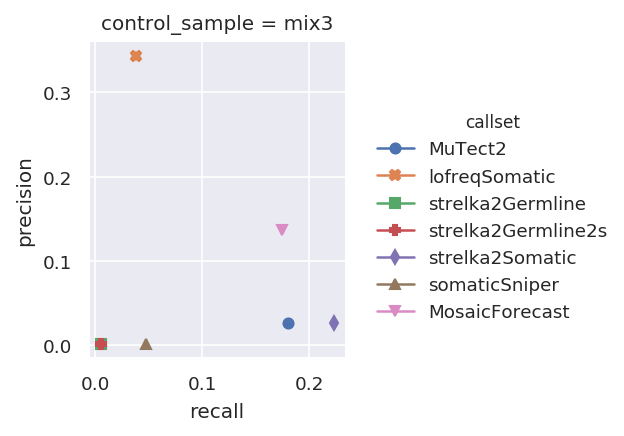

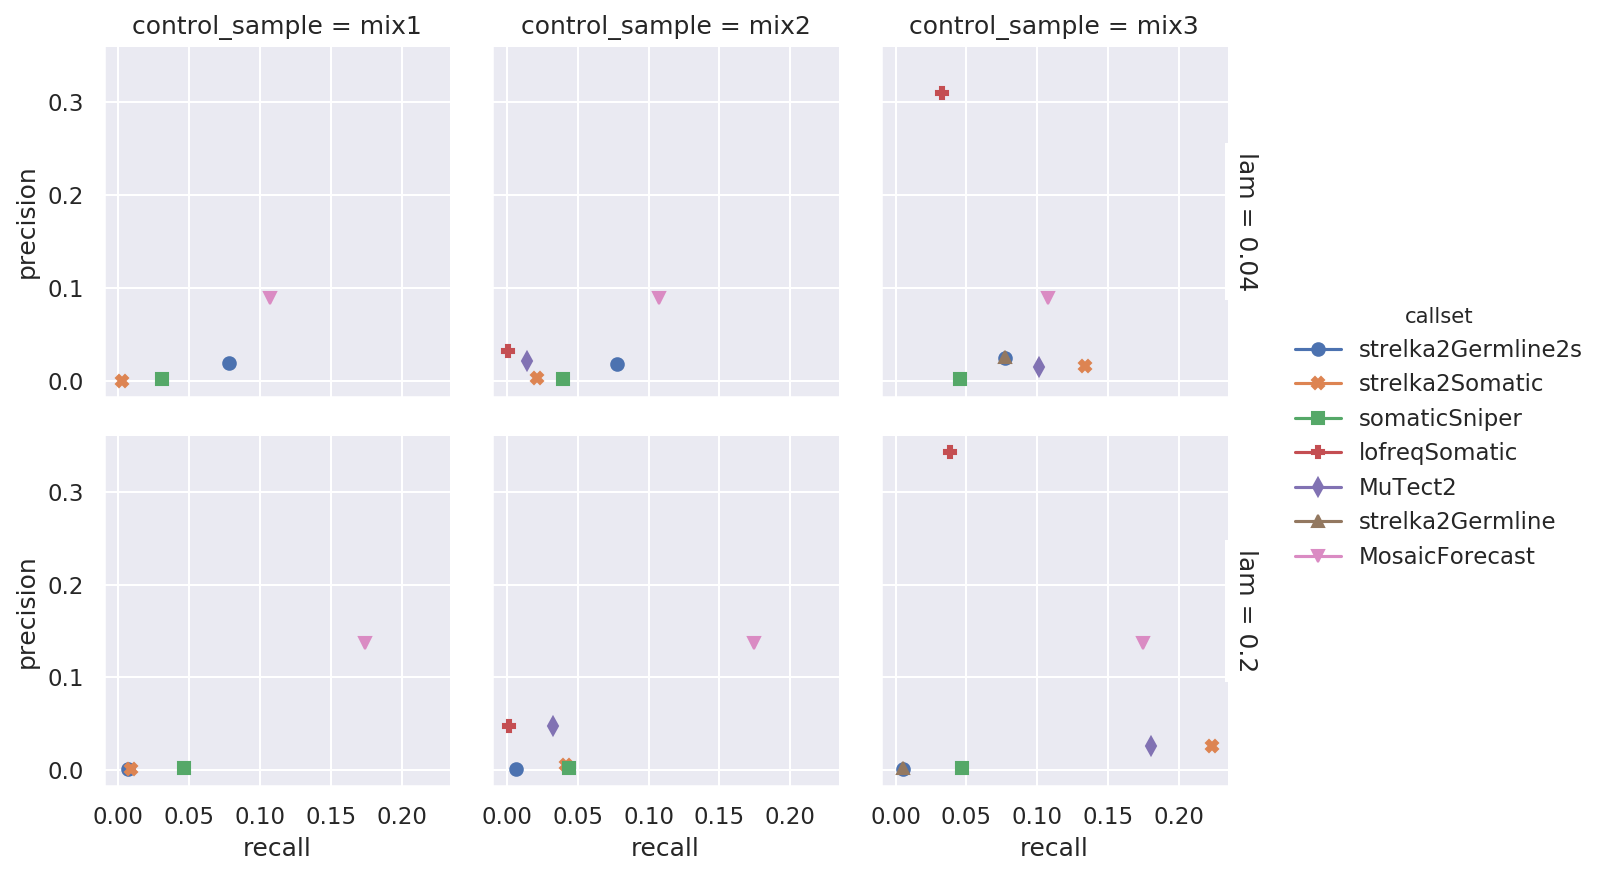

In [20]:
fg = multipr.plotter5(pr, s2g=-3, region='autosomes', vartype='snp', onepanel=True)
attila_utils.savefig(fg, 'prec-recall-snp-region-autosomes-mix3_ctr')
fg = multipr.plotter5(pr, s2g=-3, region='autosomes', vartype='snp', onepanel=False)
attila_utils.savefig(fg, 'prec-recall-snp-region-autosomes')

['named-figure/prec-recall-indel-region-autosomes.png',
 'named-figure/prec-recall-indel-region-autosomes.pdf']

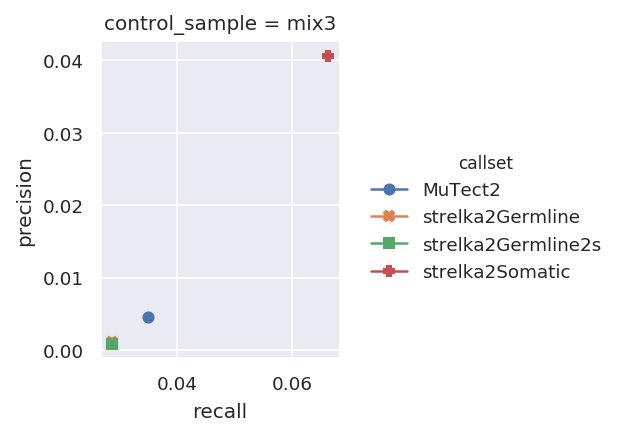

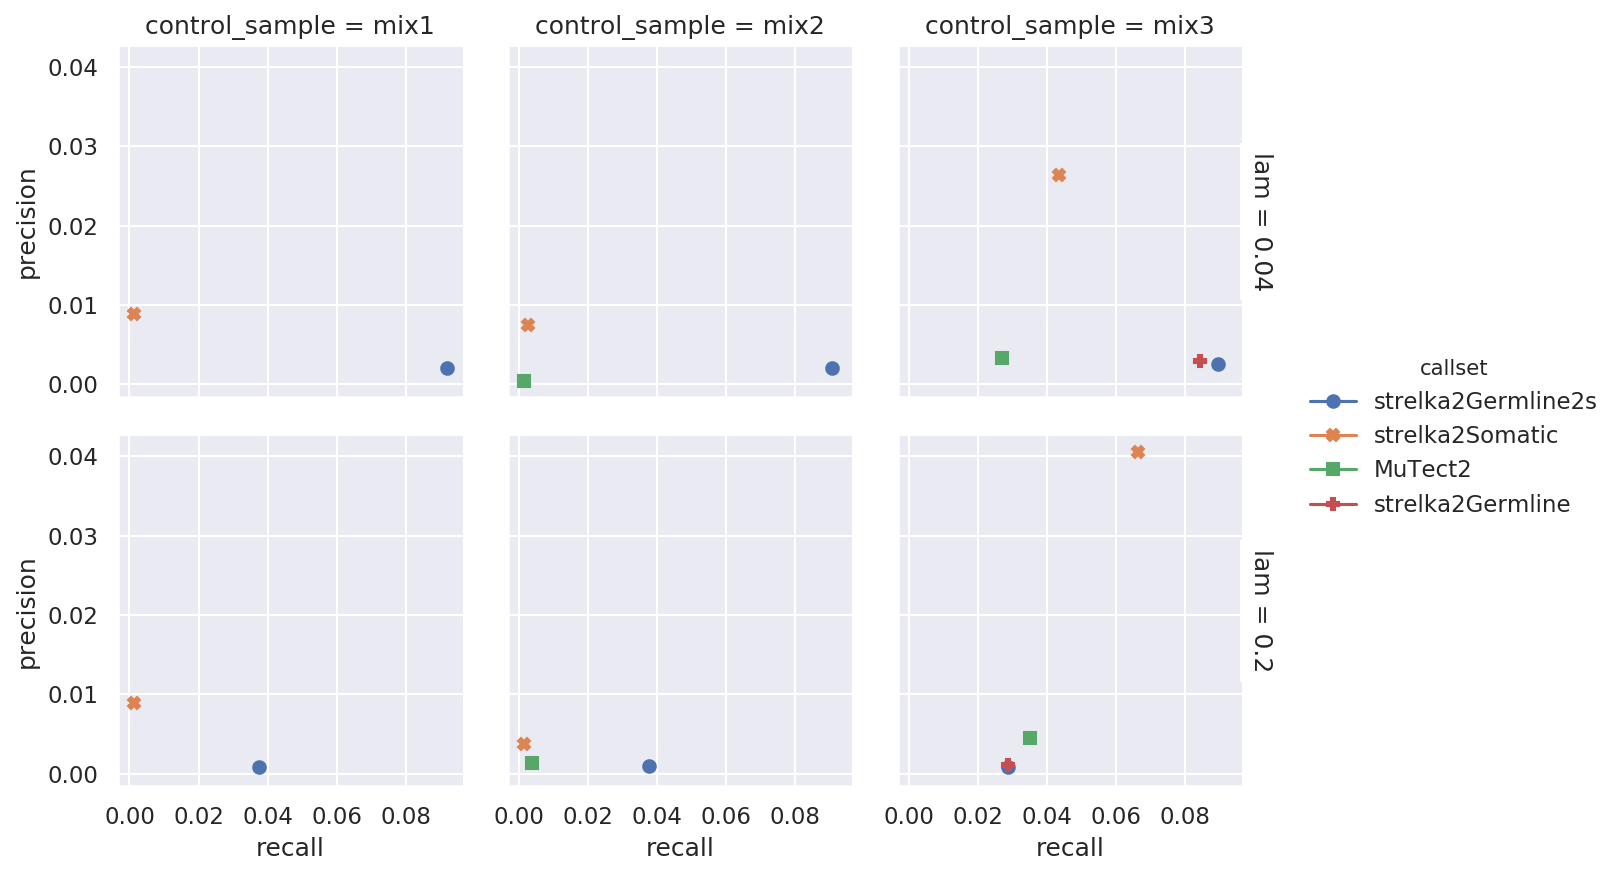

In [21]:
fg = multipr.plotter5(pr, s2g=-3, region='autosomes', vartype='indel', onepanel=True)
attila_utils.savefig(fg, 'prec-recall-indel-region-autosomes-mix3_ctr')
fg = multipr.plotter5(pr, s2g=-3, region='autosomes', vartype='indel', onepanel=False)
attila_utils.savefig(fg, 'prec-recall-indel-region-autosomes')

## Effect of control sample

['named-figure/prec-recall-controlsample-effect.png',
 'named-figure/prec-recall-controlsample-effect.pdf']

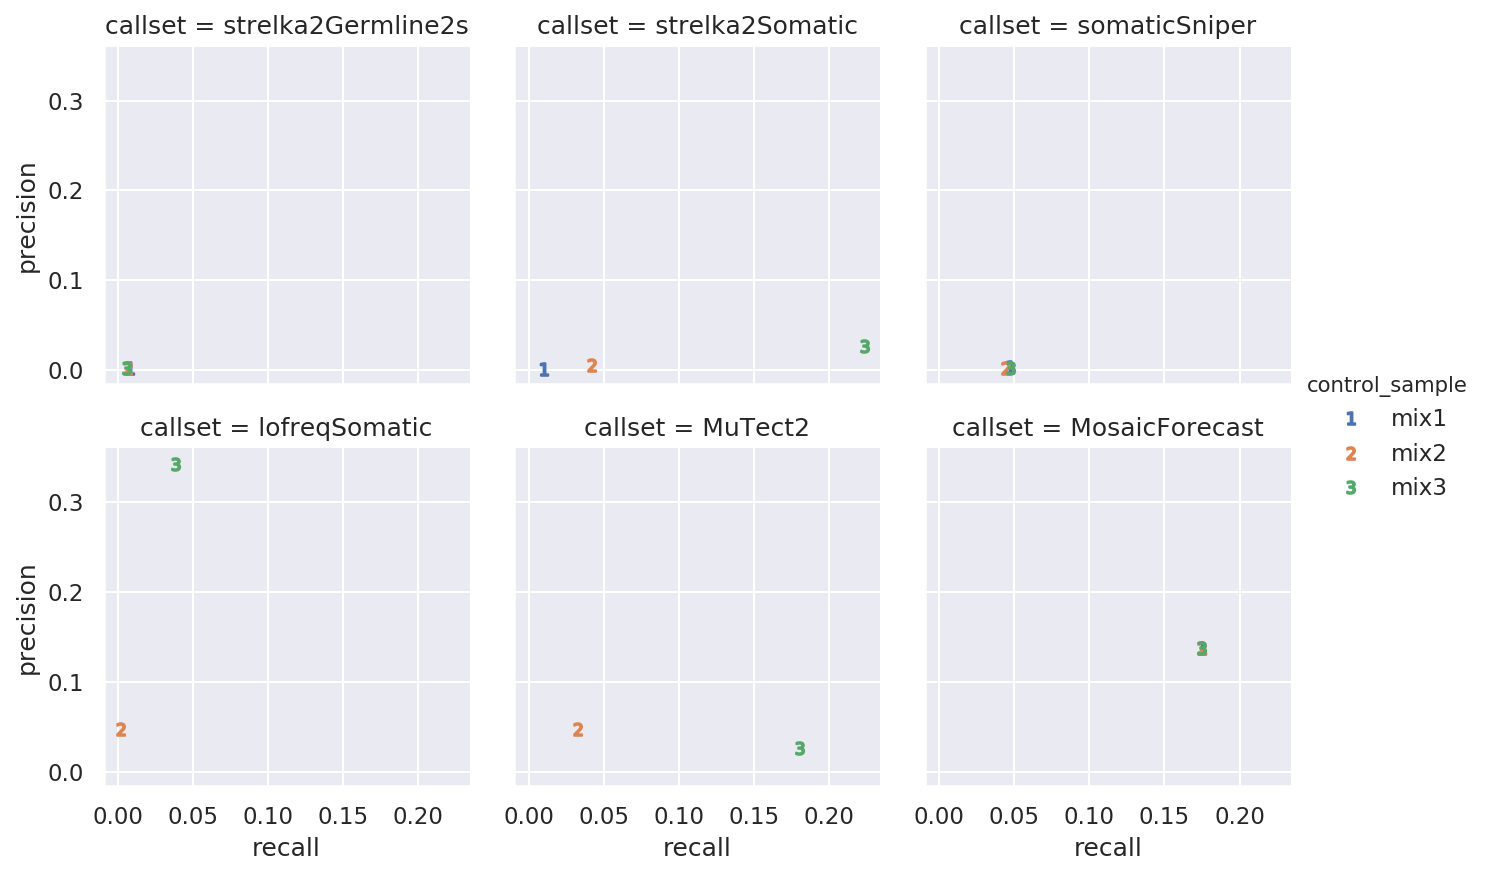

In [22]:
fg = multipr.plotter6(pr, region='autosomes', vartype='snp', explanvar='control_sample')
attila_utils.savefig(fg, 'prec-recall-controlsample-effect')

## Effect of AAF distribution

['named-figure/prec-recall-lambda-effect.png',
 'named-figure/prec-recall-lambda-effect.pdf']

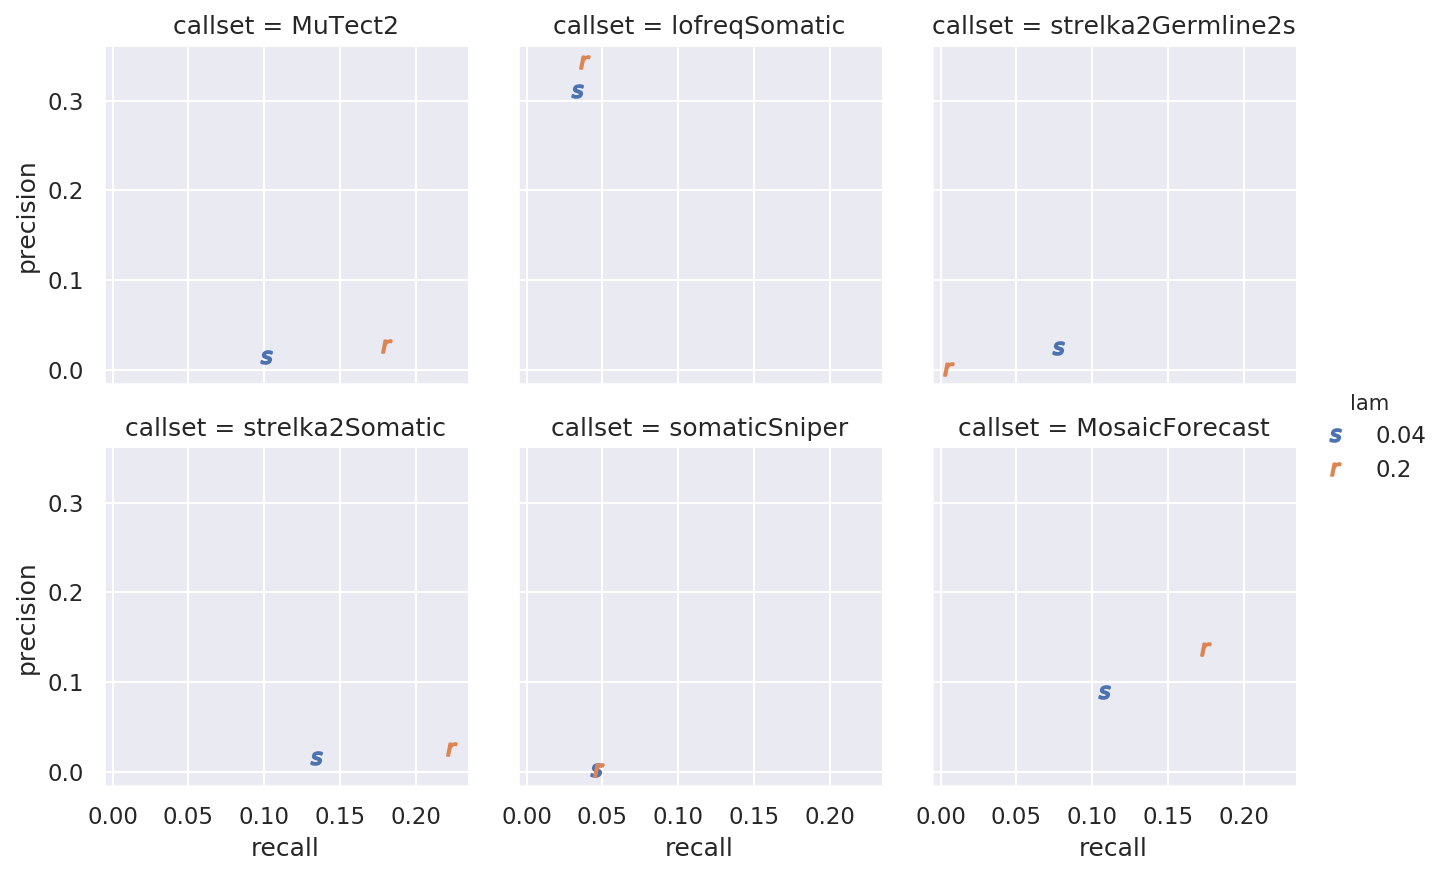

In [23]:
fg = multipr.plotter6(pr, region='autosomes', vartype='snp', explanvar='lam')
attila_utils.savefig(fg, 'prec-recall-lambda-effect')

## Effect of number of somatic variants

['named-figure/prec-recall-s2g-effect.png',
 'named-figure/prec-recall-s2g-effect.pdf']

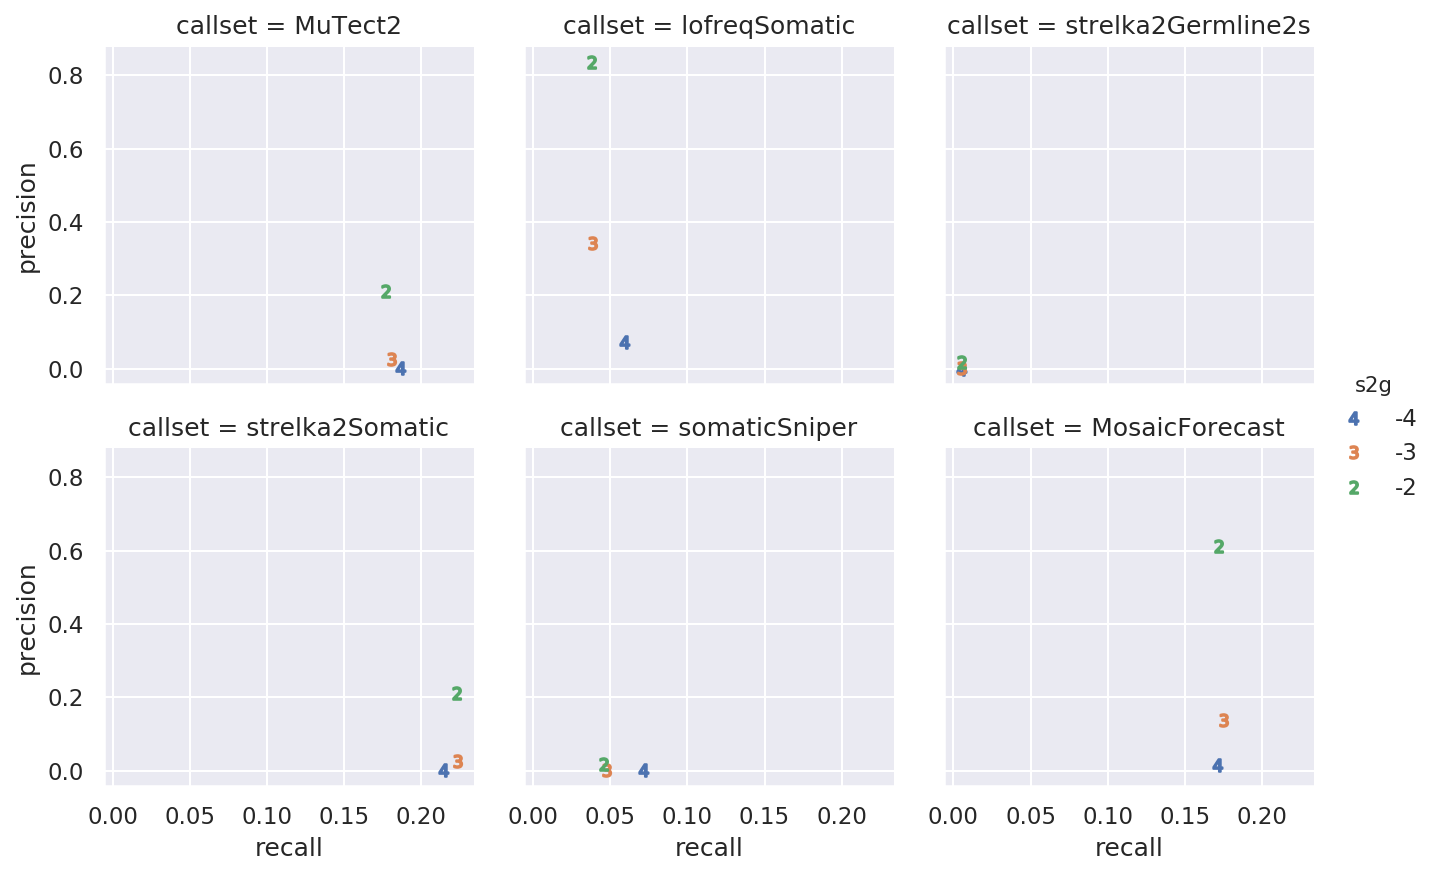

In [24]:
fg = multipr.plotter6(pr, region='autosomes', vartype='snp', explanvar='s2g')
attila_utils.savefig(fg, 'prec-recall-s2g-effect')

## VariantMetaCaller

['named-figure/prec-recall-vmc-s2g-2.png',
 'named-figure/prec-recall-vmc-s2g-2.pdf']

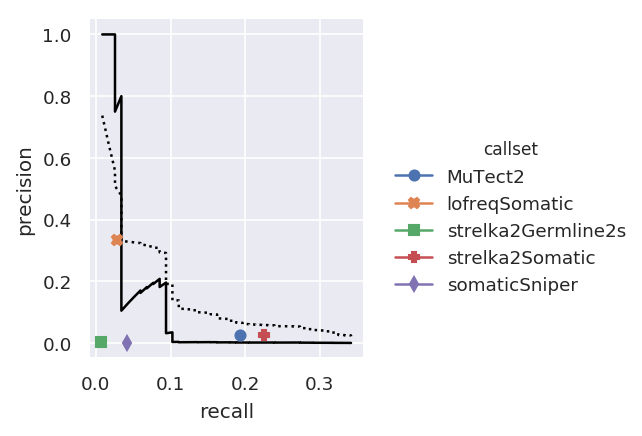

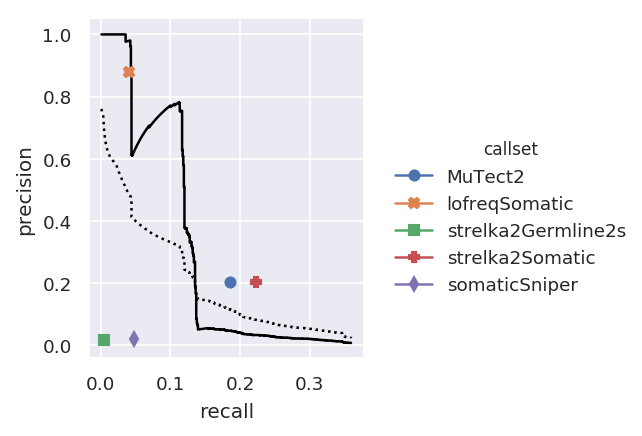

In [25]:
fg = multipr.plotter_vmc1(pr, vmc_pr, s2g=-3)
attila_utils.savefig(fg, 'prec-recall-vmc-s2g-3')
fg = multipr.plotter_vmc1(pr, vmc_pr, s2g=-2)
attila_utils.savefig(fg, 'prec-recall-vmc-s2g-2')

In [26]:
%connect_info

{
  "shell_port": 36321,
  "iopub_port": 52565,
  "stdin_port": 46191,
  "control_port": 50317,
  "hb_port": 51547,
  "ip": "127.0.0.1",
  "key": "29044189-220d22a065a1f5fdf87cd427",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ff822c3d-af13-478e-881c-831e81444d8d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
